# ABCD graph generation with `abcd-graph`

## Installation

In [17]:
!pip install abcd-graph['networkx, matplotlib']

In [6]:
!pip list | grep abcd-graph

abcd-graph                0.1.0          /home/aleksander/Desktop/myproject/abcd-graph


In [5]:
!pip list | grep networkx

networkx                  3.3


In [18]:
!pip list | grep matplotlib

matplotlib                3.9.0
matplotlib-inline         0.1.7


## Building a graph

In [7]:
from abcd_graph import Graph, ABCDParams

In [8]:
params = ABCDParams()

# gamma: float = Field(description="Power-law parameter for degrees, between 2 and 3", kw_only=True, default=2.5)

# delta: int = Field(description="Min degree", kw_only=True, default=5)

# zeta: float = Field(description="Parameter for max degree, between 0 and 1", kw_only=True, default=0.5)

# beta: float = Field(
#     description="Power-law parameter for community sizes, between 1 and 2",
#     kw_only=True,
#     default=1.5,
# )

# s: int = Field(description="Min community size", kw_only=True, default=20)

# tau: float = Field(description="Parameter for max community size, between zeta and 1", kw_only=True, default=0.8)

# xi: float = Field(description="Noise parameter, between 0 and 1", kw_only=True, default=0.25)

In [9]:
n = 100

In [27]:
graph = Graph(n=n, params=params)

graph.build()  # default - using configuration model
graph.is_built

True

In [28]:
graph.summary

{'number_of_nodes': 100,
 'number_of_edges': 336,
 'number_of_communities': 4,
 'model': 'configuration_model',
 'is_proper_abcd': True}

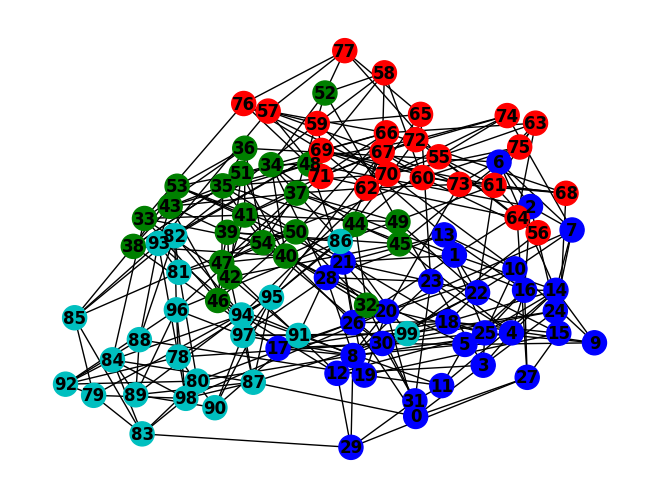

In [29]:
graph.draw_communities()

In [30]:
# export to networkx
graph.to_networkx()

In [31]:
# fetch the underlying adjacency matrix
graph.adj_matrix

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

In [24]:
# build with a different model
from abcd_graph.api.abcd_models import chung_lu

graph.reset()
graph.is_built

False

In [25]:
graph.build(model=chung_lu)
graph.summary

{'number_of_nodes': 100,
 'number_of_edges': 314,
 'number_of_communities': 3,
 'model': 'chung_lu',
 'is_proper_abcd': True}

In [26]:
# drawing is not yet supported for the Chung-Lu model